#  Washington Post Display Ads Optimization

## Context and Problem Statement

Content publishers such as The New York Times, The Washington Post and The Wall Street Journal generate revenue by using display advertisements.


The Washington Post's website contains several different sections including Sports and National. The number of views each section gets per day can be estimated by analyzing
historical data. Assume that the Sports section gets six million views per day and the National section
get five million views per day.

Assume four companies, GEICO, Delta, T-mobile and Capital One, wish to advertise on the Sports
and National sections of the Washington Post and they contract directly with the newspaper. For each
company, the contract specifies the number of times its display ads are shown in these two sections.
The contracts sometimes also specify a total number of page views that can originate from any section
of the newspaper. The page views promised by The Washington Post to each advertiser are
summarized in Table 1 below. 

| Company | Sports | National | Total         
| :---:|:---: | :---:|:---:
| GEICO|2 million | 1 million|-
| Delta|- | 1 million|2 million
| T-Mobile|1 million | 1 million|3 million
| Capital One|- | -|2 million

Assume that the contract also specifies that The Washington Post receives \$2.30 per click-through from each of the four companies. However, not every page view leads to a click. If every 1000 views leads to 5 clicks, the click-through rate is 0.5$\%$. Newspapers use historical data and tracking technologies to determine click-through rates. Assume that the relevant click-through rates are given in the Table 2 below.

| Company | Sports | National          
| :---:|:---: | :---:
| GEICO|$2.5\%$ | $0.8\%$
| Delta|$2.0\%$| $1.0\%$
| T-Mobile|$1.0\%$| $3.0\%$
| Capital One|$1.5\%$| $2.0\%$




## Optimization Problem
Find the optimal advertisement placement to maximize the revenue while meeting the promised page views.  

### Decision variables
Let $i$ be the index of the advertisers:
<br>$i = 1$ is Geico
<br>$i = 2$ is Delta
<br>$i = 3$ is T-Mobile
<br>$i = 4$ is Capital One
<br>
<br>Let $j$ be the index of the categories:
<br>$j = 1$ is Sport section
<br>$j = 2$ is National section
<br>
<br>$x_{ij}$ represents the number of impressions of advertiser $i$ in section $j$.
<br>$k_{ij}$ represents the CTR of advertiser $i$ in section $j$. 
<br>For example, $x_{11}$represents the number of impressions in the Sport section of Geico. $k_{11}$represents the CTR of Geico in the Sport section.

### Objective
\begin{equation}
Objective=2.3\times \sum_{i=1}^4\sum_{j=1}^{2}  \kappa_{ij}\times x_{ij}
\end{equation}

### Constraints

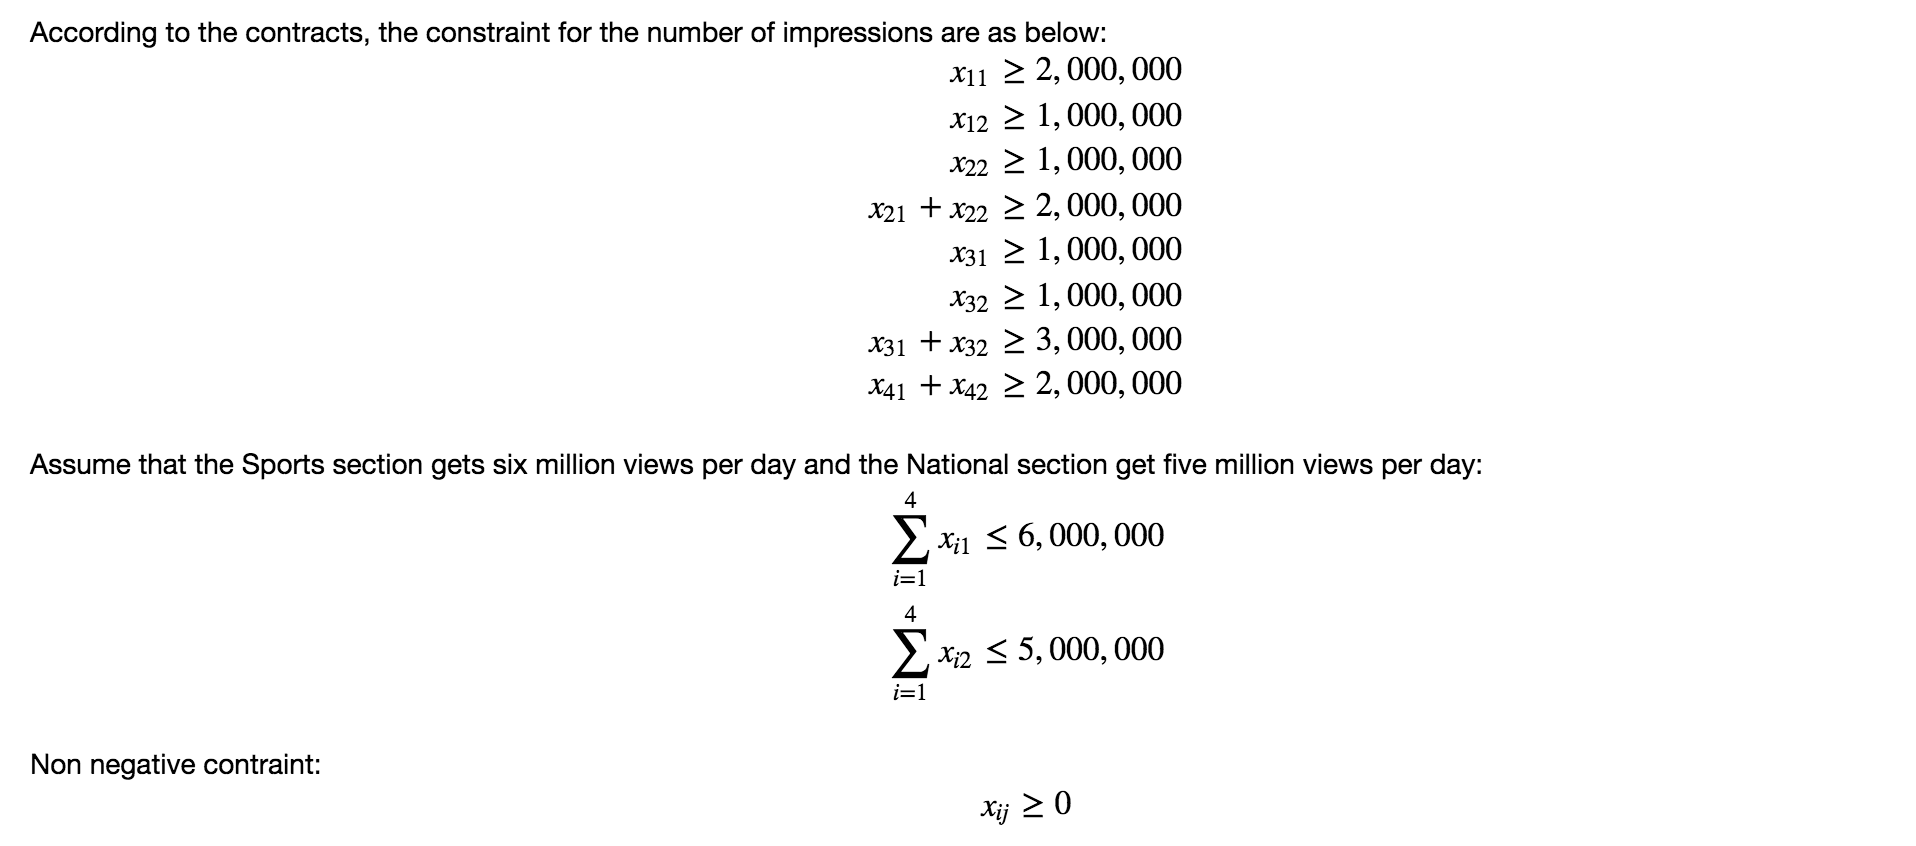

In [1]:
#!pip install cvxopt
#!pip install cvxpy

In [2]:
import cvxpy as cvx
from cvxopt.modeling import variable
from cvxopt.modeling import op
import math
import numpy as np
import pandas as pd

In [3]:
# Define integer variables

x11 = cvx.Int() # Geico in Sports
x12 = cvx.Int() # Geico in National
x21 = cvx.Int() # Delta in Sports
x22 = cvx.Int() # Delta in National
x31 = cvx.Int() # T-Mobile in Sports
x32 = cvx.Int() # T-Mobile in National
x41 = cvx.Int() # Capital One in Sports
x42 = cvx.Int() # Capital One in National

# CTR

k11 = 2.5/100
k12 = 0.8/100
k21 = 2.0/100
k22 = 1.0/100
k31 = 1.0/100
k32 = 3.0/100
k41 = 1.5/100
k42 = 2.0/100


# Objection Function

obj = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + k22 * x22 + k31 * x31 + 
             k32 * x32 + k41 * x41 + k42 * x42)
objective = cvx.Maximize(obj)

# Define constraints

c1 = x11 >= 2000000 
c2 = x12 >= 1000000 
c3 = x22 >= 1000000 
c4 = x21+x22 == 2000000 
c5 = x31 >= 1000000
c6 = x32 >= 1000000
c7 = x31+x32 == 3000000
c8 = x41+x42 == 2000000
c9 = x11+x21+x31+x41 <= 6000000
c10 = x12+x22+x32+x42 <= 5000000
c11 = x21 >= 0
c12 = x41 >= 0
c13 = x42 >= 0

# List of total constraint conditions

con=[c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

### What is the optimal solution? Give the values of the decision variables and the optimal objective function value.


In [4]:
# Solve Optimal Solution

prob = cvx.Problem(objective, con)
result = prob.solve()

print('The optimal revenue is')
print(prob.value)

print('The optimal allocation in Sport is')
print (x11.value)
print (x21.value)
print (x31.value)
print (x41.value)

print('The optimal allocation in National is')
print (x12.value,0)
print (x22.value,0)
print (x32.value,0)
print (x42.value,0)

The optimal revenue is
523199.9999984559
The optimal allocation in Sport is
3000000.0
999999.999969
1000000.00001
1000000.00002
The optimal allocation in National is
1000000.0 0
1000000.00003 0
1999999.99999 0
999999.999978 0


### Conduct sensitivity analyses of the optimal solution to different click-through rates as given in the table below. Do one cell at time if you want, e.g., sensitivity of the solution to different CTRs for GEICO in the Sports section, then in the National section; then do the same for each advertiser.

| Company | Sports | National          
| :---:|:---: | :---:
| GEICO|$From$ $2\%$ $to$ $3\%$ | $From$ $0.1\%$ $to$ $1.1\%$
| Delta|$From$ $1.5\%$ $to$ $2.5\%$| $From$ $0.5\%$ $to$ $1.5\%$
| T-Mobile|$From$ $0.5\%$ $to$ $1.5\%$| $From$ $2.5\%$ $to$ $3.5\%$
| Capital One|$From$ $1.5\%$ $to$ $2.0\%$| $From$ $1.5\%$ $to$ $2.5\%$


In [6]:
# CTR

ctr11 = np.linspace(0.02, 0.03, 11)
ctr12 = np.linspace(0.001, 0.011, 11)
ctr21 = np.linspace(0.015, 0.025, 11)
ctr22 = np.linspace(0.005, 0.015, 11)
ctr31 = np.linspace(0.005, 0.015, 11)
ctr32 = np.linspace(0.025, 0.035, 11)
ctr41 = np.linspace(0.015, 0.02, 6)
ctr42 = np.linspace(0.015, 0.025, 11)

sensitive = pd.DataFrame(columns = ['Company','Sport CTR','National CTR', 'optimal revenue',
                               'x11 allocation','x12 allocation','x21 allocation','x22 allocation',
                               'x31 allocation','x32 allocation','x41 allocation','x42 allocation'])

#### Sensitivity Geico

In [7]:
for ctr in ctr11:

# Define of integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr11 = 2.4 * (ctr * x11 + k12 * x12 + k21 * x21 + k22 * x22 + 
                   k31 * x31 + k32 * x32 + k41 * x41 + k42 * x42)
  objective_ctr11 = cvx.Maximize(obj_ctr11)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr11 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr11 = cvx.Problem(objective_ctr11, con_ctr11)
  result_ctr11 = prob_ctr11.solve()
  
  opt_rev_ctr11 = prob_ctr11.value

  x11_ctr11 = x11.value
  x12_ctr11 = x12.value
  x21_ctr11 = x21.value
  x22_ctr11 = x22.value
  x31_ctr11 = x31.value
  x32_ctr11 = x32.value
  x41_ctr11 = x41.value
  x42_ctr11 = x42.value
  
  sensitive_ctr11 = ["GEICO", ctr ,k12, opt_rev_ctr11, 
                      x11_ctr11, x12_ctr11,
                      x21_ctr11, x22_ctr11,
                      x31_ctr11, x32_ctr11,
                      x41_ctr11, x42_ctr11]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr11

In [8]:
for ctr in ctr12:

# Define of integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr12 = 2.4 * (k11 * x11 + ctr * x12 + k21 * x21 + k22 * x22 + 
                   k31 * x31 + k32 * x32 + k41 * x41 + k42 * x42)
  objective_ctr12 = cvx.Maximize(obj_ctr12)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr12 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr12 = cvx.Problem(objective_ctr12, con_ctr12)
  result_ctr12 = prob_ctr12.solve()
  
  opt_rev_ctr12 = prob_ctr12.value

  x11_ctr12 = x11.value
  x12_ctr12 = x12.value
  x21_ctr12 = x21.value
  x22_ctr12 = x22.value
  x31_ctr12 = x31.value
  x32_ctr12 = x32.value
  x41_ctr12 = x41.value
  x42_ctr12 = x42.value
  
  sensitive_ctr12 = ["GEICO", k11, ctr, opt_rev_ctr12, 
                      x11_ctr12, x12_ctr12,
                      x21_ctr12, x22_ctr12,
                      x31_ctr12, x32_ctr12,
                      x41_ctr12, x42_ctr12]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr12

In [39]:
sensitive[sensitive["Company"]=="GEICO"]

,Company,Sport CTR,National CTR,optimal revenue,x11 allocation,x12 allocation,x21 allocation,x22 allocation,x31 allocation,x32 allocation,x41 allocation,x42 allocation
0,GEICO,0.02,0.008,None,None,None,None,None,None,None,None,None
1,GEICO,0.021,0.008,None,None,None,None,None,None,None,None,None
2,GEICO,0.022,0.008,None,None,None,None,None,None,None,None,None
3,GEICO,0.023,0.008,None,None,None,None,None,None,None,None,None
4,GEICO,0.024,0.008,None,None,None,None,None,None,None,None,None
5,GEICO,0.025,0.008,None,None,None,None,None,None,None,None,None
6,GEICO,0.026,0.008,None,None,None,None,None,None,None,None,None
7,GEICO,0.027,0.008,None,None,None,None,None,None,None,None,None
8,GEICO,0.028,0.008,None,None,None,None,None,None,None,None,None
9,GEICO,0.029,0.008,None,None,None,None,None,None,None,None,None


#### Sensitivity Delta

In [9]:
for ctr in ctr21:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr21 = 2.4 * (k11 * x11 + k12 * x12 + ctr * x21 + k22 * x22 + 
                   k31 * x31 + k32 * x32 + k41 * x41 + k42 * x42)
  objective_ctr21 = cvx.Maximize(obj_ctr21)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr21 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr21 = cvx.Problem(objective_ctr21, con_ctr21)
  result_ctr21 = prob_ctr21.solve()
  
  opt_rev_ctr21 = prob_ctr21.value

  x11_ctr21 = x11.value
  x12_ctr21 = x12.value
  x21_ctr21 = x21.value
  x22_ctr21 = x22.value
  x31_ctr21 = x31.value
  x32_ctr21 = x32.value
  x41_ctr21 = x41.value
  x42_ctr21 = x42.value
  
  sensitive_ctr21 = ["DELTA", ctr ,k22, opt_rev_ctr21, 
                      x11_ctr21, x12_ctr21,
                      x21_ctr21, x22_ctr21,
                      x31_ctr21, x32_ctr21,
                      x41_ctr21, x42_ctr21]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr21

In [0]:
for ctr in ctr22:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr22 = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + ctr * x22 + 
                   k31 * x31 + k32 * x32 + k41 * x41 + k42 * x42)
  objective_ctr22 = cvx.Maximize(obj_ctr22)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr22 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr22 = cvx.Problem(objective_ctr22, con_ctr22)
  result_ctr22 = prob_ctr22.solve()
  
  opt_rev_ctr22 = prob_ctr22.value

  x11_ctr22 = x11.value
  x12_ctr22 = x12.value
  x21_ctr22 = x21.value
  x22_ctr22 = x22.value
  x31_ctr22 = x31.value
  x32_ctr22 = x32.value
  x41_ctr22 = x41.value
  x42_ctr22 = x42.value
  
  sensitive_ctr22 = ["DELTA", k21, ctr, opt_rev_ctr22, 
                      x11_ctr22, x12_ctr22,
                      x21_ctr22, x22_ctr22,
                      x31_ctr22, x32_ctr22,
                      x41_ctr22, x42_ctr22]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr22

In [45]:
sensitive[sensitive["Company"]=="DELTA"]

,Company,Sport CTR,National CTR,optimal revenue,x11 allocation,x12 allocation,x21 allocation,x22 allocation,x31 allocation,x32 allocation,x41 allocation,x42 allocation
33,DELTA,0.015,0.01,451200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
34,DELTA,0.016,0.01,458400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
35,DELTA,0.017,0.01,465600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
36,DELTA,0.018,0.01,472800,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
37,DELTA,0.019,0.01,480000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
38,DELTA,0.02,0.01,487200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
39,DELTA,0.021,0.01,494400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
40,DELTA,0.022,0.01,501600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
41,DELTA,0.023,0.01,508800,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
42,DELTA,0.024,0.01,516000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06


#### T-Mobile

In [0]:
for ctr in ctr31:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr31 = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + k22 * x22 + 
                   ctr * x31 + k32 * x32 + k41 * x41 + k42 * x42)
  objective_ctr31 = cvx.Maximize(obj_ctr31)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr31 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr31 = cvx.Problem(objective_ctr31, con_ctr31)
  result_ctr31 = prob_ctr31.solve()
  
  opt_rev_ctr31 = prob_ctr31.value

  x11_ctr31 = x11.value
  x12_ctr31 = x12.value
  x21_ctr31 = x21.value
  x22_ctr31 = x22.value
  x31_ctr31 = x31.value
  x32_ctr31 = x32.value
  x41_ctr31 = x41.value
  x42_ctr31 = x42.value
  
  sensitive_ctr31 = ["T-Mobile", ctr , k32, opt_rev_ctr31, 
                      x11_ctr31, x12_ctr31,
                      x21_ctr31, x22_ctr31,
                      x31_ctr31, x32_ctr31,
                      x41_ctr31, x42_ctr31]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr31

In [0]:
for ctr in ctr32:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr32 = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + k22 * x22 + 
                   k31 * x31 + ctr * x32 + k41 * x41 + k42 * x42)
  objective_ctr32 = cvx.Maximize(obj_ctr32)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr32 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr32 = cvx.Problem(objective_ctr32, con_ctr32)
  result_ctr32 = prob_ctr32.solve()
  
  opt_rev_ctr32 = prob_ctr32.value

  x11_ctr32 = x11.value
  x12_ctr32 = x12.value
  x21_ctr32 = x21.value
  x22_ctr32 = x22.value
  x31_ctr32 = x31.value
  x32_ctr32 = x32.value
  x41_ctr32 = x41.value
  x42_ctr32 = x42.value
  
  sensitive_ctr32 = ["T-Mobile", k31 ,ctr, opt_rev_ctr32, 
                      x11_ctr32, x12_ctr32,
                      x21_ctr32, x22_ctr32,
                      x31_ctr32, x32_ctr32,
                      x41_ctr32, x42_ctr32]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr32

In [51]:
sensitive[sensitive["Company"]=="T-Mobile"]

,Company,Sport CTR,National CTR,optimal revenue,x11 allocation,x12 allocation,x21 allocation,x22 allocation,x31 allocation,x32 allocation,x41 allocation,x42 allocation
77,T-Mobile,0.005,0.03,511200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
78,T-Mobile,0.006,0.03,513600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
79,T-Mobile,0.007,0.03,516000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
80,T-Mobile,0.008,0.03,518400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
81,T-Mobile,0.009,0.03,520800,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
82,T-Mobile,0.01,0.03,523200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
83,T-Mobile,0.011,0.03,525600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
84,T-Mobile,0.012,0.03,528000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
85,T-Mobile,0.013,0.03,530400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
86,T-Mobile,0.014,0.03,532800,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06


#### Capital One

In [0]:
for ctr in ctr41:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr41 = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + k22 * x22 + 
                   k31 * x31 + k32 * x32 + ctr * x41 + k42 * x42)
  objective_ctr41 = cvx.Maximize(obj_ctr41)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr41 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr41 = cvx.Problem(objective_ctr41, con_ctr41)
  result_ctr41 = prob_ctr41.solve()
  
  opt_rev_ctr41 = prob_ctr41.value

  x11_ctr41 = x11.value
  x12_ctr41 = x12.value
  x21_ctr41 = x21.value
  x22_ctr41 = x22.value
  x31_ctr41 = x31.value
  x32_ctr41 = x32.value
  x41_ctr41 = x41.value
  x42_ctr41 = x42.value
  
  sensitive_ctr41 = ["Capital One", ctr , k42, opt_rev_ctr41, 
                      x11_ctr41, x12_ctr41,
                      x21_ctr41, x22_ctr41,
                      x31_ctr41, x32_ctr41,
                      x41_ctr41, x42_ctr41]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr41

In [0]:
for ctr in ctr42:

# Define integer variables

  x11 = cvx.Int() # Geico in Sports
  x12 = cvx.Int() # Geico in National
  x21 = cvx.Int() # Delta in Sports
  x22 = cvx.Int() # Delta in National
  x31 = cvx.Int() # T-Mobile in Sports
  x32 = cvx.Int() # T-Mobile in National
  x41 = cvx.Int() # Capital One in Sports
  x42 = cvx.Int() # Capital One in National

# Objection Function

  obj_ctr42 = 2.4 * (k11 * x11 + k12 * x12 + k21 * x21 + k22 * x22 + 
                   k31 * x31 + k32 * x32 + k41 * x41 + ctr * x42)
  objective_ctr42 = cvx.Maximize(obj_ctr42)

# Define constraints

  c1 = x11 >= 2000000 
  c2 = x12 >= 1000000 
  c3 = x22 >= 1000000 
  c4 = x21 + x22 == 2000000 
  c5 = x31 >= 1000000
  c6 = x32 >= 1000000
  c7 = x31 + x32 == 3000000
  c8 = x41 + x42 == 2000000
  c9 = x11 + x21 + x31 + x41 <= 6000000
  c10 = x12 + x22 + x32 + x42 <= 5000000
  c11 = x21 >= 0
  c12 = x41 >= 0
  c13 = x42 >= 0

# List of total constraint conditions

  con_ctr42 = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

# Solve Optimal Solution

  prob_ctr42 = cvx.Problem(objective_ctr42, con_ctr42)
  result_ctr42 = prob_ctr42.solve()
  
  opt_rev_ctr42 = prob_ctr42.value

  x11_ctr42 = x11.value
  x12_ctr42 = x12.value
  x21_ctr42 = x21.value
  x22_ctr42 = x22.value
  x31_ctr42 = x31.value
  x32_ctr42 = x32.value
  x41_ctr42 = x41.value
  x42_ctr42 = x42.value
  
  sensitive_ctr42 = ["Capital One", k41 ,ctr, opt_rev_ctr42, 
                      x11_ctr42, x12_ctr42,
                      x21_ctr42, x22_ctr42,
                      x31_ctr42, x32_ctr42,
                      x41_ctr42, x42_ctr42]
  
  sensitive.loc[len(sensitive),:] = sensitive_ctr42

In [57]:
sensitive[sensitive["Company"]=="Capital One"]

,Company,Sport CTR,National CTR,optimal revenue,x11 allocation,x12 allocation,x21 allocation,x22 allocation,x31 allocation,x32 allocation,x41 allocation,x42 allocation
105,Capital One,0.015,0.02,523200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
106,Capital One,0.016,0.02,525600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
107,Capital One,0.017,0.02,528000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
108,Capital One,0.018,0.02,530400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
109,Capital One,0.019,0.02,532800,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
110,Capital One,0.02,0.02,535200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
111,Capital One,0.015,0.015,511200,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
112,Capital One,0.015,0.016,513600,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
113,Capital One,0.015,0.017,516000,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06
114,Capital One,0.015,0.018,518400,3e+06,1e+06,1e+06,1e+06,1e+06,2e+06,1e+06,1e+06


### Conclusion

From the above result, we can conclude that with only a little change in CTR, the allocation of budget doesn't change. Therefore, the optimized revenue isn't sensitive to the above change of CTR.